# Telecommunication Churn Prediction

**This Noteboook is a Detailed Analysis and Exploration of Telecommunication Customer Churn Dataset**. Predicting Churn which is `Binary Classification` Problem

## Reference

- [Dataset Link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/)

## Topics
- Notebook Preparation
- Data Collection
- Data Exploration and Analysis
- Data Preprocessing
- Training Model and Evaluation
- Conclusion

## Notebook Preparation

Installing & Importing Neccessary Packages is first thing to do ...

In [170]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [130]:
# Saving Directory for Files

workingDir = '/kaggle/working/'

## Data Collection

In [143]:
# Loading Data into Pandas

datasetUrl = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(datasetUrl, index_col = 'customerID')

In [131]:
df.to_csv('/kaggle/working/' + 'originalDataset.csv')

Since Customer Id is not useful for ths analysis and prediction, We can use it as `index col`

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


At first glance, dataset provides us the gender and columns with **Binary Value**. Only few has more than two values. This make half of Preprocessing Work easier.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Exploration and Analysis

1. Finding How many Numerical column and Categorical Colum

In [6]:
totalCols = df.columns.tolist()

In [7]:
numericalCols = df.select_dtypes(include = 'number').columns.tolist()

print(f"Number of Numerical Columns: {len(numericalCols)}")

Number of Numerical Columns: 3


In [8]:
categoricalCols = df.select_dtypes(include = 'object').columns.tolist()
print(f"Number of Categorical Columns: {len(categoricalCols)}")

Number of Categorical Columns: 17


In [9]:
len(totalCols) == len(numericalCols) + len(categoricalCols)

True

2. Analyze Binary or More than Two valued cols

Ok. Now by ploting the distribution, we can understand the count and analyze some insights, But first we need to get all the columns have `Binary values`. We can also do some analze on columns have more than two values

In [10]:
binaryCols = [column for column in df.columns if len(df[column].unique()) == 2]
print("Columns with binary values:", binaryCols)

Columns with binary values: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [11]:
colsForPieChart = [column for column in df.columns if len(df[column].unique()) == 3]
print("Columns with binary values:", colsForPieChart)

Columns with binary values: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']


In [12]:
def pieChartFunction(cols, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

    axes = axes.flatten()

    for i, column in enumerate(cols):
        counts = df[column].value_counts()
        counts.plot.pie(autopct='%1.1f%%', startangle=120, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    plt.tight_layout(w_pad=2, h_pad=2)

    plt.show()

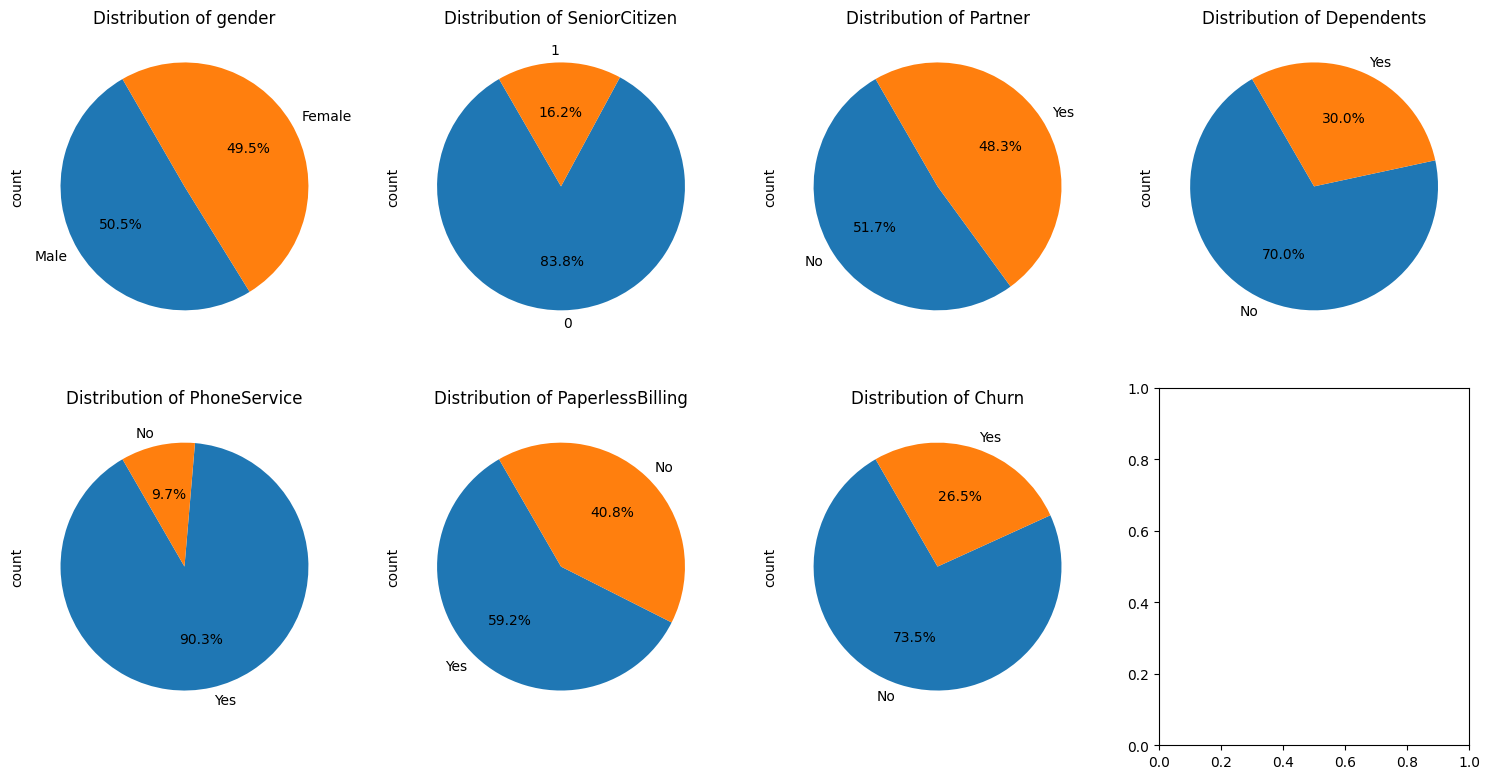

In [13]:
pieChartFunction(binaryCols, 2, 4)

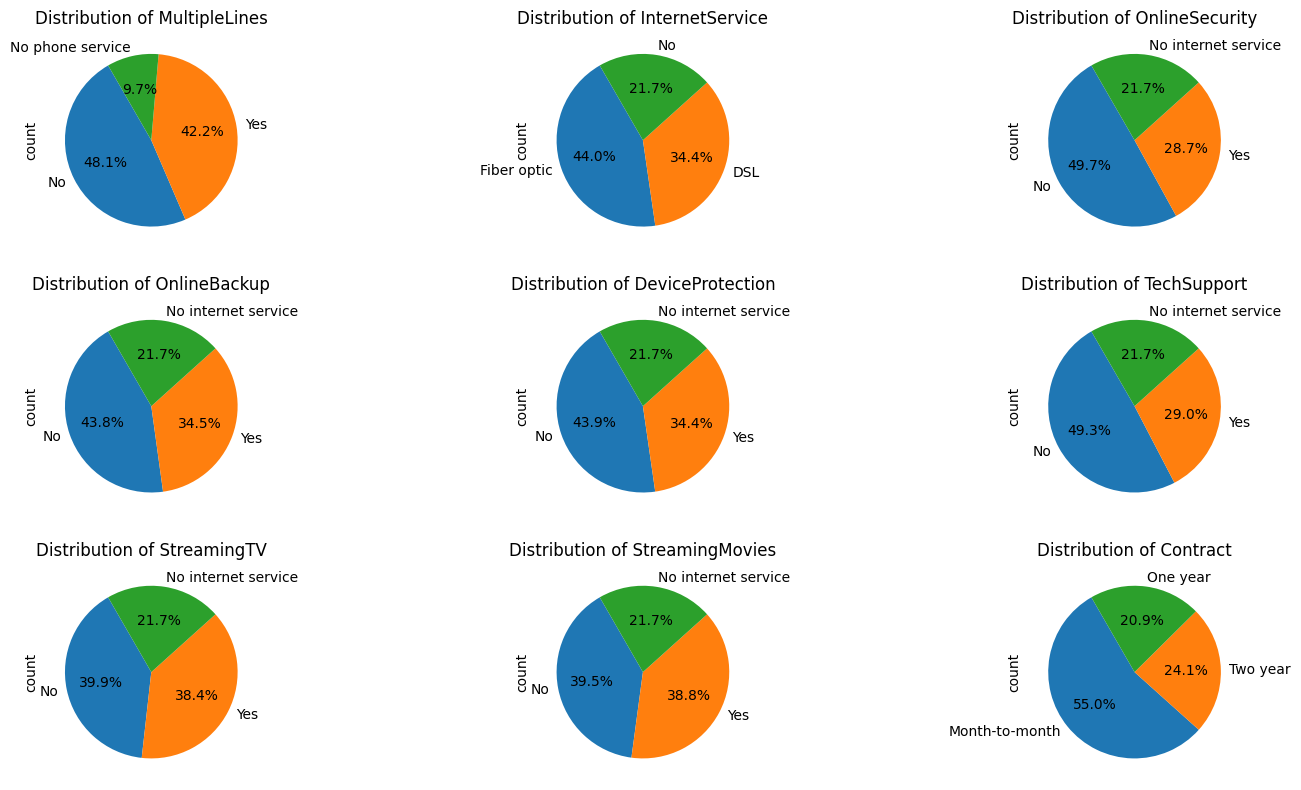

In [14]:
pieChartFunction(colsForPieChart, 3, 3)

Question 1. Does Senior Citizen have phone and if yes what is tha amount ?

<Figure size 800x600 with 0 Axes>

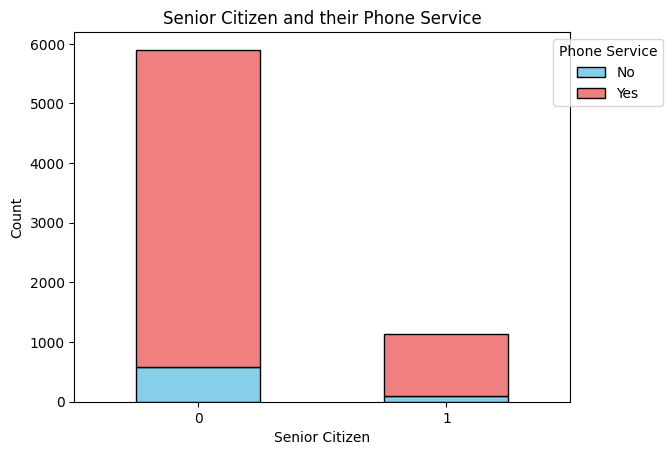

In [15]:
ct = pd.crosstab(df['SeniorCitizen'], df['PhoneService'])

plt.figure(figsize=(8, 6))
ct.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Senior Citizen and their Phone Service')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Phone Service', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

That Does answer the questions - No Senior Citizen has less service for phone

Question 2. Does Senior Citizen even have internet service and if yes what is tha amount ?

<Figure size 800x600 with 0 Axes>

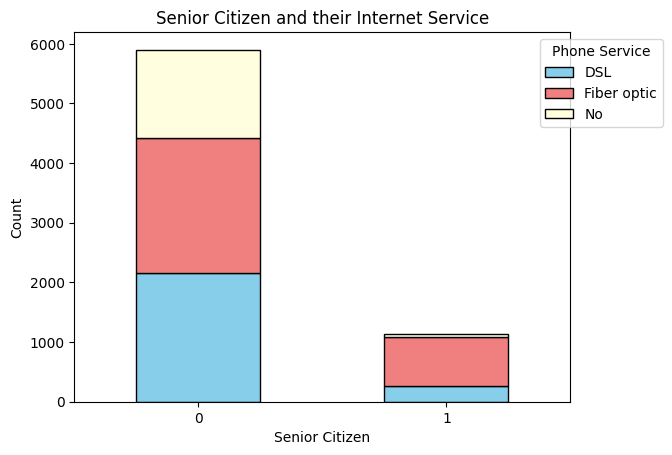

In [16]:
ct = pd.crosstab(df['SeniorCitizen'], df['InternetService'])

plt.figure(figsize=(8, 6))
ct.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightyellow'], edgecolor='black')
plt.title('Senior Citizen and their Internet Service')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Phone Service', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Compared to Phone Service, They do have a good Internet Service

## Data Preprocessing

ToDo
- OneHot Binary Categorical Values
- OneHot Remaining Categorical Values
- Fine best columns that gives best result


But first let's create sample dataframe, incase things gone sideways

In [78]:
sample = df.sample(50)

In [93]:
# One Hot Encoding Binary Categorical Values

binaryCatCols = []

for index, values in dict(df[binaryCols].dtypes).items():
    if values == 'object':
        binaryCatCols.append(index)
        
print(binaryCatCols)
        

def changeBinaryCat(data, cols = binaryCatCols):
    for column in cols:
        uniqueValues = data[column].unique()
        if 'Yes' in uniqueValues and 'No' in uniqueValues:
            data[column] = data[column].map({'Yes': 1, 'No': 0})
        elif 'Male' in uniqueValues and 'Female' in uniqueValues:
            data[column] = data[column].map({'Male': 1, 'Female': 0})

    return data

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [94]:
sample = changeBinaryCat(sample);

In [20]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [21]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [22]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [23]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [24]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [25]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [26]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [27]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

1. Now Real Preprocessing starts, that is based on the assumption we will process the columns. Columns like `MultipleLines` has values like **No Phone Services**. So Only if Phone Service available, multiple lines exists, Then `No Phone Services can be considered No.
2. Other Columns like `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTv`, `StreamingMovies` has values like **No Internet Service**, So Technically it means *NO* right away.
3. One Column `InternetService` has *No* answer and with other internet services. So Technically Other than value *No*, Everthing considered as *Yes*.

Let's One Hot Encode it.

In [81]:
def oneHotNonBinary(data):

    for column in ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService', 'OnlineSecurity']:
        unique = data[column].unique()
        if 'Fiber optic' in unique:
            data[column] = data[column].map({'DSL': 0, 'Fiber optic': 1, 'No': 0})
            
        elif 'No internet service' in unique:
            data[column] = data[column].map({'No internet service': 0, 'Yes': 1, 'No': 0})
            
        else:
            data[column] = data[column].map({'No phone service': 0, 'Yes': 1, 'No': 0})
    return data

In [82]:
sample = oneHotNonBinary(sample);

No Columns Like `Contract`, `PaymentMethod` columns will be one-hot encode with Sklearn's Feature

In [83]:
colsToEncode = ['Contract', "PaymentMethod"]

def oneHotEncodeFunction(data, colsToEncode = colsToEncode):
    sampleEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[colsToEncode])
    encodedCols = list(sampleEncoder.get_feature_names_out(colsToEncode))

    data[encodedCols] = sampleEncoder.transform(data[colsToEncode])
    data.drop(colsToEncode, axis = 1, inplace = True)
    return data

In [84]:
sample = oneHotEncodeFunction(sample);

In [85]:
sample.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
8033-VCZGH,1,0,1,0,50,1,1,1,1,0,...,103.95,5231.3,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5095-AESKG,0,0,1,0,3,1,1,1,0,1,...,91.50,242.95,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7951-QKZPL,0,0,1,1,33,1,1,0,0,0,...,24.50,740.3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
0343-QLUZP,1,0,0,0,60,0,0,0,1,1,...,39.60,2424.5,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9036-CSKBW,0,0,0,0,51,1,1,1,1,1,...,107.45,5680.9,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7156-MHUGY,1,1,0,0,13,1,0,1,0,0,...,90.50,1201.15,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3027-YNWZU,0,0,1,0,64,1,1,0,0,0,...,25.00,1584.8,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0156-FVPTA,1,0,1,0,22,1,0,0,1,0,...,54.20,1152.7,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8474-UMLNT,0,0,0,0,13,1,0,0,1,1,...,67.80,842.25,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [86]:
sample.dtypes == object

gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
MultipleLines                              False
InternetService                            False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                                True
Churn                                      False
Contract_Month-to-month                    False
Contract_One year                          False
Contract_Two year   

Now everything is cleared, But if you `TotalCharges` column has object type in it, though it has numerical value

In [87]:
sample['TotalCharges'] = sample['TotalCharges'].astype('float')

In [88]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 8033-VCZGH to 0336-KXKFK
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   50 non-null     int64  
 1   SeniorCitizen                            50 non-null     int64  
 2   Partner                                  50 non-null     int64  
 3   Dependents                               50 non-null     int64  
 4   tenure                                   50 non-null     int64  
 5   PhoneService                             50 non-null     int64  
 6   MultipleLines                            50 non-null     int64  
 7   InternetService                          50 non-null     int64  
 8   OnlineSecurity                           50 non-null     int64  
 9   OnlineBackup                             50 non-null     int64  
 10  DeviceProtection                        

Now, this is not clear code. To Clean this everything will go in a `Pipeline`

In [144]:
class PreprocessPipeline(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X = changeBinaryCat(X)
        X = oneHotNonBinary(X)
        X = oneHotEncodeFunction(X)
        X['TotalCharges'] = pd.to_numeric(X['TotalCharges'].replace(' ', 0), errors='coerce')
        return X

In [145]:
preprocessPipeline = PreprocessPipeline()
preprocessDf = preprocessPipeline.fit_transform(df)

In [146]:
preprocessDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                      

In [147]:
preprocessDf.to_csv(workingDir + 'preprocessDataset.csv')

Now prepraing the dataset for `Training`, `Validation`, `Testing` by spliting it up

In [148]:
X, y = preprocessDf.drop(columns = ['Churn'], axis = 1), preprocessDf['Churn']

trainX, tempX, trainY, tempY = train_test_split(X, y, test_size=0.3, random_state=42)
valX, testX, valY, testY = train_test_split(tempX, tempY, test_size=0.33, random_state=42)


print(f"Training set size: {len(trainX)} samples")
print(f"Validation set size: {len(valX)} samples")
print(f"Testing set size: {len(testX)} samples")

Training set size: 4930 samples
Validation set size: 1415 samples
Testing set size: 698 samples


## Training and Evaluation

- The reason to go with SVM is it's ability to classify under High Dimension Space, Since we have more than 20 rows. it's good using SVM and GridSearch side by side

In [150]:
paramGrid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10],
              'kernel': ['rbf']}

In [151]:
svmModel = SVC(random_state = 42)

gridSearch = GridSearchCV(svmModel, paramGrid, cv=3, scoring='accuracy')
gridSearch.fit(trainX, trainY)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [160]:
trainingScore = gridSearch.best_score_

print(f"Best Score on Training: {trainingScore}")

Best Score on Training: 0.7640971379970273


In [158]:
pd.DataFrame(gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.532576,0.012403,0.284508,0.000740,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.757299,0.757760,0.760803,0.758621,0.001555,3
1,0.534547,0.003666,0.319673,0.010087,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.748175,0.746196,0.744370,0.746247,0.001554,6
2,0.526146,0.019610,0.313955,0.000863,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.737226,0.737675,0.737066,0.737323,0.000258,13
3,0.538208,0.021682,0.335887,0.030236,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.737226,0.737675,0.737066,0.737323,0.000258,13
4,0.644565,0.041709,0.320092,0.040784,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.765207,0.762021,0.765064,0.764097,0.001469,1
5,0.658106,0.076214,0.335071,0.015293,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.762165,0.762629,0.763847,0.762880,0.000709,2
6,0.601555,0.034245,0.319114,0.005283,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.742092,0.744370,0.743761,0.743408,0.000963,9
7,0.596767,0.011272,0.324894,0.014522,1,10,rbf,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}",0.739659,0.740110,0.740718,0.740162,0.000434,10
8,0.742181,0.035765,0.265878,0.001675,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.728102,0.735240,0.744370,0.735904,0.006658,15
9,0.639457,0.018386,0.330598,0.029784,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.762165,0.757152,0.754108,0.757808,0.003322,4


In [159]:
valPreds = gridSearch.predict(valX)
valScore = accuracy_score(valPreds, valY)

print(f"Validation Score: {valScore}")

Validation Score: 0.792226148409894


In [162]:
testPreds = gridSearch.predict(testX)
testScore = accuracy_score(testPreds, testY)

print(f"Testing Score: {testScore}")

Testing Score: 0.7507163323782235


In [ ]:
import jobliba

Will try another model just for confrimation

In [172]:
paramGrid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rfModel = RandomForestClassifier(random_state = 42)

gridSearch = GridSearchCV(rfModel, paramGrid, cv=3, scoring='accuracy')
gridSearch.fit(trainX, trainY)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [173]:
trainingScore = gridSearch.best_score_

print(f"Best Score on Training: {trainingScore}")

Best Score on Training: 0.8026359956146131


In [174]:
pd.DataFrame(gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.244643,0.003264,0.024064,0.000137,True,None,1,2,50,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.788321,0.782106,0.773585,0.781337,0.006041,152
1,0.492275,0.009764,0.043110,0.003174,True,None,1,2,100,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.785280,0.781497,0.770542,0.779106,0.006250,155
2,0.714731,0.013348,0.058187,0.003244,True,None,1,2,150,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.793796,0.777845,0.774802,0.782148,0.008329,149
3,0.228004,0.001731,0.022045,0.000838,True,None,1,5,50,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.793796,0.782715,0.783932,0.786814,0.004962,137
4,0.446389,0.005727,0.037875,0.001862,True,None,1,5,100,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.796837,0.785149,0.780280,0.787422,0.006948,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.474097,0.003038,0.041915,0.003149,False,20,4,5,100,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.806569,0.788801,0.788801,0.794724,0.008376,83
158,0.702021,0.012861,0.056468,0.003217,False,20,4,5,150,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.805961,0.790018,0.788801,0.794927,0.007818,79
159,0.231555,0.007186,0.021200,0.000344,False,20,4,10,50,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.803528,0.790018,0.785758,0.793101,0.007575,105
160,0.462851,0.006415,0.039661,0.000298,False,20,4,10,100,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.802920,0.790627,0.787584,0.793710,0.006630,98


In [175]:
valPreds = gridSearch.predict(valX)
valScore = accuracy_score(valPreds, valY)

print(f"Validation Score: {valScore}")

Validation Score: 0.8120141342756184


In [176]:
testPreds = gridSearch.predict(testX)
testScore = accuracy_score(testPreds, testY)

print(f"Testing Score: {testScore}")

Testing Score: 0.7865329512893983


RandomForest Classifier Gave `80%`. Compared to SVM, Random Forest Gave `10%` increase in accuracy.

In [178]:
import joblib
bestModel = gridSearch.best_estimator_
joblib.dump(bestModel, workingDir + 'RandomForestClassifier.pkl')

['/kaggle/working/RandomForestClassifier.pkl']

## Conclusion and Keypoints

- This Notebook contain an analysis and prediction of `TeleCommunication Company Churn` Dataset.
- Contain 30% Binary Values, 40% Non Binary Categorical Values, 30% Other Values.
- PieChart Decribes the distribution of Various Categorical and Discrete Values.
- Random Forest Score More than SVM.